In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn import tree
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split

In [117]:
data = pd.read_csv("C:/Users/a525281/Documents/Python Scripts/pandas/adult.csv")

In [118]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [119]:
data = data.replace({'?': np.nan}).dropna()

In [120]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [121]:
data.shape

(30162, 15)

In [122]:
data.income.value_counts()

<=50K    22654
>50K      7508
Name: income, dtype: int64

In [123]:
data.income = data.income.map({'>50K':1, '<=50K':0})

In [124]:
data.income.value_counts()

0    22654
1     7508
Name: income, dtype: int64

In [125]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
age               30162 non-null int64
workclass         30162 non-null object
fnlwgt            30162 non-null int64
education         30162 non-null object
education.num     30162 non-null int64
marital.status    30162 non-null object
occupation        30162 non-null object
relationship      30162 non-null object
race              30162 non-null object
sex               30162 non-null object
capital.gain      30162 non-null int64
capital.loss      30162 non-null int64
hours.per.week    30162 non-null int64
native.country    30162 non-null object
income            30162 non-null int64
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [127]:
data.dtypes.values

array([dtype('int64'), dtype('O'), dtype('int64'), dtype('O'),
       dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('O'), dtype('int64')], dtype=object)

In [128]:
obj_cols=data.dtypes[data.dtypes=='object'].index

In [129]:
for cols in obj_cols:
    data = data.join(pd.get_dummies(data[cols], prefix=cols).iloc[:,:-1])

In [130]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,...,native.country_Poland,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,...,0,0,0,0,0,0,0,0,1,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,...,0,0,0,0,0,0,0,0,1,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,...,0,0,0,0,0,0,0,0,1,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,...,0,0,0,0,0,0,0,0,1,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,...,0,0,0,0,0,0,0,0,1,0


In [131]:
data_new=data.drop(obj_cols,axis=1)

In [132]:
data_new.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native.country_Poland,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam
1,82,132870,9,0,4356,18,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,54,140359,4,0,3900,40,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,41,264663,10,0,3900,40,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
5,34,216864,9,0,3770,45,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
6,38,150601,6,0,3770,40,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [133]:
data_new.columns

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week', 'income', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov', 'education_10th',
       'education_11th', 'education_12th', 'education_1st-4th',
       'education_5th-6th', 'education_7th-8th', 'education_9th',
       'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors',
       'education_Doctorate', 'education_HS-grad', 'education_Masters',
       'education_Preschool', 'education_Prof-school',
       'marital.status_Divorced', 'marital.status_Married-AF-spouse',
       'marital.status_Married-civ-spouse',
       'marital.status_Married-spouse-absent', 'marital.status_Never-married',
       'marital.status_Separated', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishi

In [134]:
data_new.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native.country_Poland,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,...,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238,0.248922,0.031265,0.068530,0.738877,...,0.001857,0.001127,0.003614,0.000365,0.002354,0.001392,0.000564,0.000597,0.911876,0.002122
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984,0.432396,0.174035,0.252657,0.439254,...,0.043049,0.033556,0.060007,0.019094,0.048461,0.037291,0.023734,0.024422,0.283480,0.046016
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [135]:
data_new.corr(method='pearson')

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native.country_Poland,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam
age,1.000000,-0.076511,0.043526,0.080154,0.060165,0.101599,0.241998,0.056626,0.068256,-0.210491,...,0.010583,0.001062,0.007836,0.000024,0.001923,-0.007879,-0.004940,0.007868,0.016259,-0.017775
fnlwgt,-0.076511,1.000000,-0.044992,0.000422,-0.009750,-0.022886,-0.008957,-0.006932,-0.003520,0.046589,...,-0.002247,-0.014020,0.007121,-0.003055,-0.010598,0.001615,-0.001241,-0.000413,-0.083390,-0.010761
education.num,0.043526,-0.044992,1.000000,0.124416,0.079646,0.152522,0.335286,0.058244,0.097378,-0.165069,...,0.000666,-0.043058,-0.042083,0.001815,0.017812,0.049129,0.008183,-0.017134,0.127207,-0.010953
capital.gain,0.080154,0.000422,0.124416,1.000000,-0.032229,0.080432,0.221196,-0.006299,-0.009624,-0.048185,...,-0.004175,-0.003826,-0.006270,-0.002816,-0.002582,0.007639,-0.003501,-0.003603,0.012375,-0.002493
capital.loss,0.060165,-0.009750,0.079646,-0.032229,1.000000,0.052417,0.150053,0.010380,0.014727,-0.036377,...,-0.005520,-0.007343,-0.004560,-0.004175,0.005677,0.005679,-0.005191,0.008849,0.015119,0.000344
hours.per.week,0.101599,-0.022886,0.152522,0.080432,0.052417,1.000000,0.229480,0.005229,0.001612,-0.095533,...,-0.005988,0.003162,-0.012015,0.000689,0.014328,-0.000305,0.012846,-0.007566,0.010673,-0.010381
income,0.241998,-0.008957,0.335286,0.221196,0.150053,0.229480,1.000000,0.057394,0.028673,-0.117218,...,-0.005236,-0.010199,-0.019337,-0.002964,-0.005812,0.017571,-0.003979,-0.007788,0.040204,-0.018215
workclass_Federal-gov,0.056626,-0.006932,0.058244,-0.006299,0.010380,0.005229,0.057394,1.000000,-0.048728,-0.302194,...,-0.003323,-0.000358,0.014579,-0.003431,-0.004795,-0.006708,-0.004266,-0.004390,0.017541,-0.000004
workclass_Local-gov,0.068256,-0.003520,0.097378,-0.009624,0.014727,0.001612,0.028673,-0.048728,1.000000,-0.456267,...,-0.002553,-0.005201,-0.001027,-0.005181,-0.013175,-0.003091,-0.006441,-0.001255,0.032937,-0.003952
workclass_Private,-0.210491,0.046589,-0.165069,-0.048185,-0.036377,-0.095533,-0.117218,-0.302194,-0.456267,1.000000,...,0.009859,0.004225,0.005613,0.003449,-0.014735,-0.010187,-0.008144,0.002164,-0.049809,0.009369


In [136]:
x = data_new.drop('income', axis=1)
y = data_new['income']

In [137]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [138]:
names=["Decision Tree","Random Forest","Ada Boost","Logistic","GBM"]

In [139]:
classifiers = [
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(n_estimators=100),
    LogisticRegression(),
    GradientBoostingClassifier(n_estimators=100)]

In [140]:
for clf in zip(names, classifiers):
    clf[1].fit(x_train, y_train) #[imp_cols]
    print(clf[0], clf[1].score(x_test, y_test)) #[imp_cols]

Decision Tree 0.842532736615
Random Forest 0.851317752362
Ada Boost 0.861594563236
Logistic 0.788662357036
GBM 0.862920603348


In [141]:
from sklearn.metrics import classification_report

In [142]:
for clf in zip(names, classifiers):
    print(clf[0])
    print(classification_report(clf[1].predict(x_test), y_test)) # [imp_cols]
    print('*'*20)


Decision Tree
             precision    recall  f1-score   support

          0       0.95      0.85      0.90      5070
          1       0.50      0.78      0.61       963

avg / total       0.88      0.84      0.86      6033

********************
Random Forest
             precision    recall  f1-score   support

          0       0.92      0.89      0.90      4735
          1       0.63      0.73      0.68      1298

avg / total       0.86      0.85      0.85      6033

********************
Ada Boost
             precision    recall  f1-score   support

          0       0.94      0.88      0.91      4839
          1       0.62      0.77      0.69      1194

avg / total       0.88      0.86      0.87      6033

********************
Logistic
             precision    recall  f1-score   support

          0       0.96      0.80      0.87      5475
          1       0.26      0.69      0.38       558

avg / total       0.90      0.79      0.83      6033

********************
GBM
     

In [143]:
from sklearn.metrics import classification_report, confusion_matrix


In [144]:
for clf in zip(names, classifiers):
    print(clf[0])
    pred = clf[1].predict(x_test)
    print(confusion_matrix(pred, y_test))
    print(classification_report(pred, y_test)) # [imp_cols]
    print('*'*20)

Decision Tree
[[4332  738]
 [ 212  751]]
             precision    recall  f1-score   support

          0       0.95      0.85      0.90      5070
          1       0.50      0.78      0.61       963

avg / total       0.88      0.84      0.86      6033

********************
Random Forest
[[4191  544]
 [ 353  945]]
             precision    recall  f1-score   support

          0       0.92      0.89      0.90      4735
          1       0.63      0.73      0.68      1298

avg / total       0.86      0.85      0.85      6033

********************
Ada Boost
[[4274  565]
 [ 270  924]]
             precision    recall  f1-score   support

          0       0.94      0.88      0.91      4839
          1       0.62      0.77      0.69      1194

avg / total       0.88      0.86      0.87      6033

********************
Logistic
[[4372 1103]
 [ 172  386]]
             precision    recall  f1-score   support

          0       0.96      0.80      0.87      5475
          1       0.26      0.

# 'Ada Boost ' is the best estimators/models for this dataset, followed by 'GBM' and 'Random Forest'

In [145]:
rndf=RandomForestClassifier(n_estimators=150)

In [146]:
rndf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [147]:
importance = pd.DataFrame.from_dict({'cols':x_train.columns, 'importance': rndf.feature_importances_})

In [148]:
importance =importance.sort_values(by='importance',ascending=False)

In [149]:
import seaborn as sns

In [150]:
%matplotlib inline

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]),
 <a list of 96 Text xticklabel objects>)

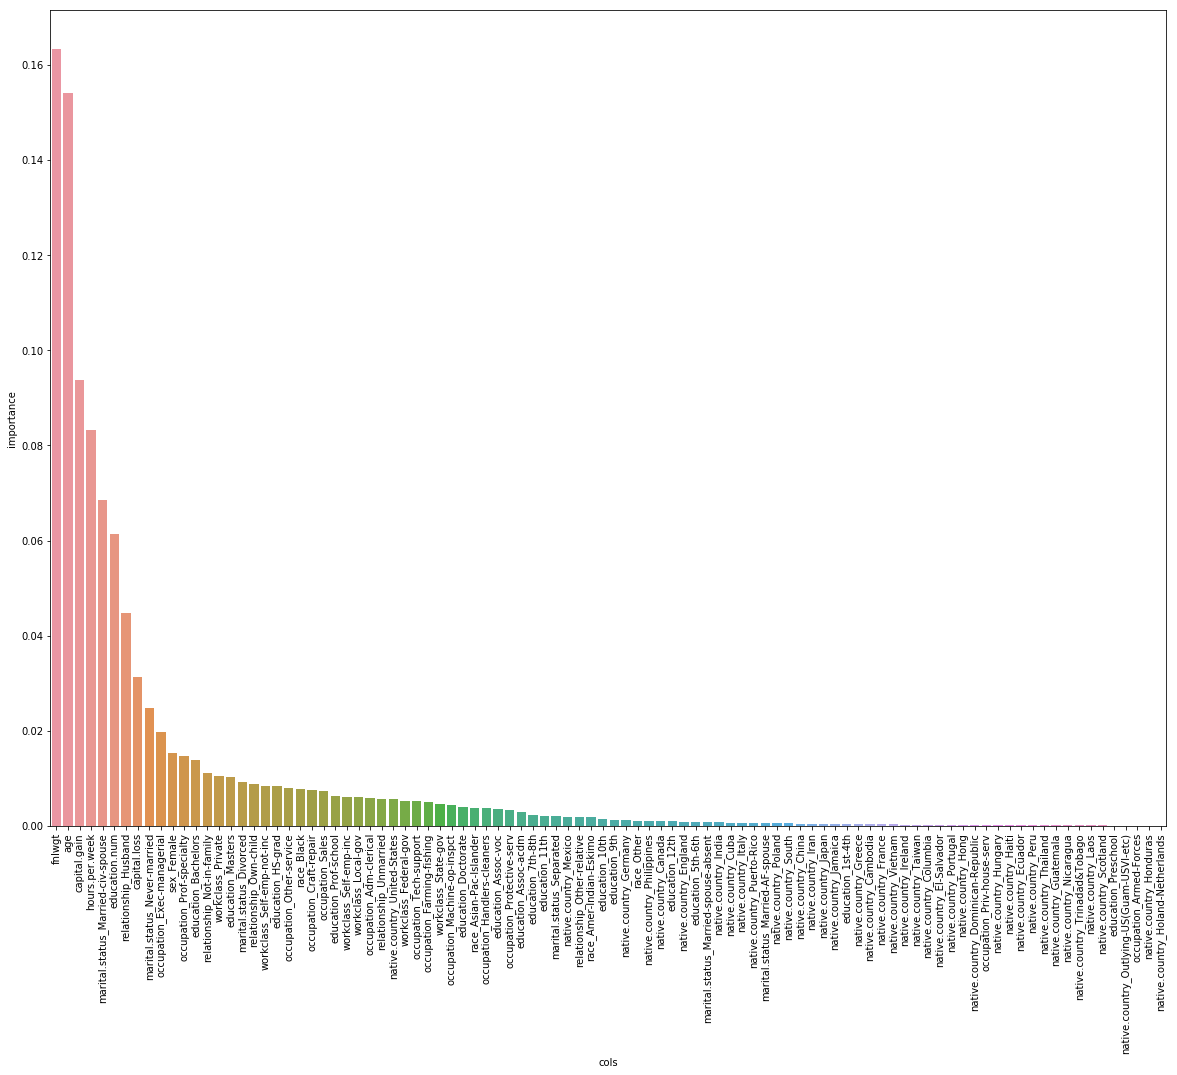

In [151]:
plt.figure(figsize=(20,15))
sns.barplot(importance.cols, importance.importance)
plt.xticks(rotation=90)


In [152]:
imp_cols = importance[importance.importance >= 0.05].cols.values


In [153]:
for clf in zip(names, classifiers):
    clf[1].fit(x_train[imp_cols], y_train) #[imp_cols]
    print(clf[0], clf[1].score(x_test[imp_cols], y_test)) #[imp_cols]

Decision Tree 0.8435272667
Random Forest 0.836399801094
Ada Boost 0.851980772418
Logistic 0.78799933698
GBM 0.854301342616


In [96]:
#  checking some other model also

import numpy
import pandas
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier


import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error


In [105]:
#  checking some other model also
num_instances = len(X)

models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('L_SVM', LinearSVC()))
models.append(('SGDC', SGDClassifier()))

# Evaluations
results = []
names = []

for name, model in models:
    # Fit the model
    model.fit(x_train, y_train)
    
    predictions = model.predict(x_test)
    
    # Evaluate the model
    score = accuracy_score(y_test, predictions)
    mse = mean_squared_error(predictions, y_test)
    # print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    results.append(mse)
    names.append(name)
    
    msg = "%s: %f (%f)" % (name, score, mse)
    print(msg)
    

LR: 0.792475 (0.207525)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA: 0.838555 (0.161445)
KNN: 0.766285 (0.233715)
CART: 0.818498 (0.181502)
NB: 0.787834 (0.212166)
SVM: 0.746726 (0.253274)
L_SVM: 0.787668 (0.212332)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDC: 0.777723 (0.222277)
